In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import keras
from keras import Sequential
from keras.layers import Dense 
from keras.regularizers import L1,L2,L1L2
from keras.optimizers import SGD


from mlxtend.plotting import plot_decision_regions

In [2]:
df = pd.read_csv(r"C:\Users\hp\Downloads\Data Science Innomatics\DS written notes\Deep_learning\DL_Assignments\Multiple CSV\5.outlier.csv", header = None)
df.head()

,0,1,2
0,-17.897000,7.662423,0
1,-26.343161,-3.055257,0
2,-19.059771,-8.531838,0
3,-16.383898,-2.352667,0
4,-12.926541,9.074994,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       600 non-null    float64
 1   1       600 non-null    float64
 2   2       600 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 14.2 KB


In [16]:
x = df.iloc[:,0:2]
y = df.iloc[:,2].astype(int)

<AxesSubplot:xlabel='0', ylabel='1'>

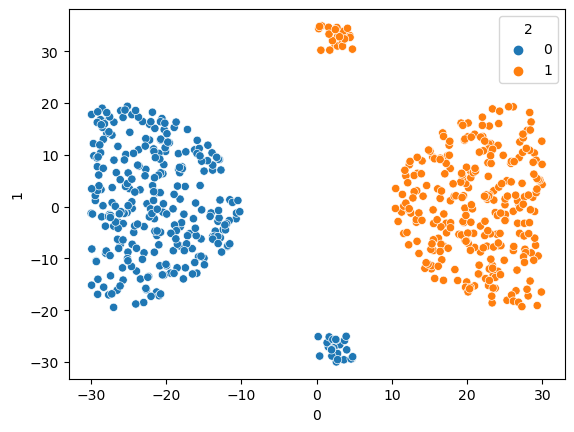

In [17]:
sns.scatterplot(data = df, x=0,y=1, hue = 2)

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)

In [21]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(420, 2) (180, 2) (420,) (180,)


In [22]:
std = StandardScaler()
x_trainp = std.fit_transform(x_train)
x_testp = std.transform(x_test)

In [23]:
model=Sequential()
model.add(Dense(16,activation="tanh",kernel_regularizer=L2(0.01),bias_regularizer=L2(0.01),input_dim=2))
model.add(Dense(10,activation="tanh",kernel_regularizer=L2(0.01),bias_regularizer=L2(0.01)))
model.add(Dense(8,activation="tanh",kernel_regularizer=L2(0.01),bias_regularizer=L2(0.01)))
model.add(Dense(4,activation="tanh",kernel_regularizer=L2(0.01),bias_regularizer=L2(0.01)))
model.add(Dense(1,activation="sigmoid",kernel_regularizer=L2(0.01),bias_regularizer=L2(0.01)))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                48        
                                                                 
 dense_1 (Dense)             (None, 10)                170       
                                                                 
 dense_2 (Dense)             (None, 8)                 88        
                                                                 
 dense_3 (Dense)             (None, 4)                 36        
                                                                 
 dense_4 (Dense)             (None, 1)                 5         
                                                                 
Total params: 347 (1.36 KB)
Trainable params: 347 (1.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
model.compile(loss="binary_crossentropy",optimizer=SGD(learning_rate=0.1),metrics=["accuracy"])

history=model.fit(x_trainp,y_train,batch_size=5,epochs=20,validation_split=0.1)

Epoch 1/20
76/76 [==============================] - 2s 8ms/step - loss: 0.5634 - accuracy: 0.9392 - val_loss: 0.3733 - val_accuracy: 1.0000
Epoch 2/20
76/76 [==============================] - 0s 3ms/step - loss: 0.3381 - accuracy: 1.0000 - val_loss: 0.3063 - val_accuracy: 1.0000
Epoch 3/20
76/76 [==============================] - 0s 4ms/step - loss: 0.2847 - accuracy: 1.0000 - val_loss: 0.2637 - val_accuracy: 1.0000
Epoch 4/20
76/76 [==============================] - 0s 4ms/step - loss: 0.2489 - accuracy: 1.0000 - val_loss: 0.2342 - val_accuracy: 1.0000
Epoch 5/20
76/76 [==============================] - 0s 3ms/step - loss: 0.2233 - accuracy: 1.0000 - val_loss: 0.2141 - val_accuracy: 1.0000
Epoch 6/20
76/76 [==============================] - 0s 4ms/step - loss: 0.2050 - accuracy: 1.0000 - val_loss: 0.1984 - val_accuracy: 1.0000
Epoch 7/20
76/76 [==============================] - 0s 3ms/step - loss: 0.1916 - accuracy: 1.0000 - val_loss: 0.1863 - val_accuracy: 1.0000
Epoch 8/20
76/76 [==

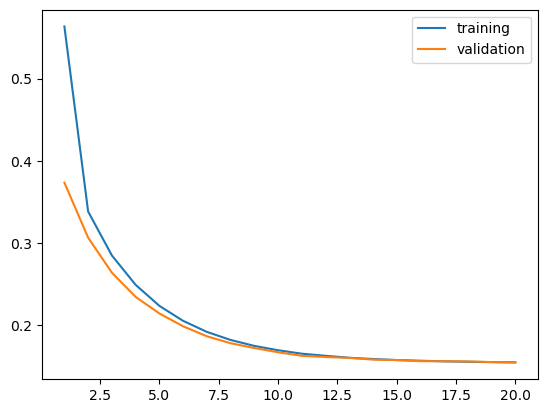

In [26]:
plt.plot(range(1,21),history.history["loss"],label="training")
plt.plot(range(1,21),history.history["val_loss"],label="validation")
plt.legend()

9600/9600 [==============================] - 15s 2ms/step


<AxesSubplot:>

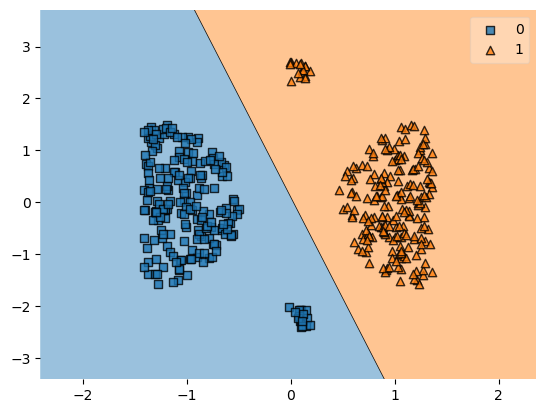

In [27]:
plot_decision_regions(x_trainp,y_train.values,clf=model)